# Decision Tree Classification with scikit-learn

This notebook demonstrates how to use the Decision Tree algorithm to classify data points using the scikit-learn library. It covers data preparation, encoding, model training, prediction, and visualization.

## Import Required Libraries

Import pandas, numpy, matplotlib, and scikit-learn modules for data handling, visualization, and machine learning.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

## Helper Function: Render DataFrame as Table

Display a pandas DataFrame as a styled table using matplotlib.

In [2]:
def render_mpl_table(
        data: pd.DataFrame, col_width: float = 4.0, row_height: float = 0.625,
        font_size: int = 14, header_color: str = "#179E86",
        row_colors: list = ["#f1f1f2", "#ffffff"], edge_color: str = "black",
        bbox: list = [0, 0, 1, 1], header_font_color: str = "white",
        ax: plt.Axes = None, **kwargs) -> plt.Axes:
    # Create the figure and axes if not provided.
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        _, ax = plt.subplots(figsize=size)
        ax.axis("off")
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight="bold", color=header_font_color)
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
    return ax

## Step 1: Define the Dataset

Create a simple dataset of fruit color, diameter, and type.

In [3]:
dataset = [
    ["Green (0)", 3, "Apple"],
    ["Yellow (2)", 3, "Apple"],
    ["Red (1)", 1, "Grape"],
    ["Red (1)", 1, "Grape"],
    ["Yellow (2)", 3, "Lemon"]
]

## Step 2: Convert Dataset to DataFrame and Display

Convert the dataset to a pandas DataFrame and display it as a styled table.

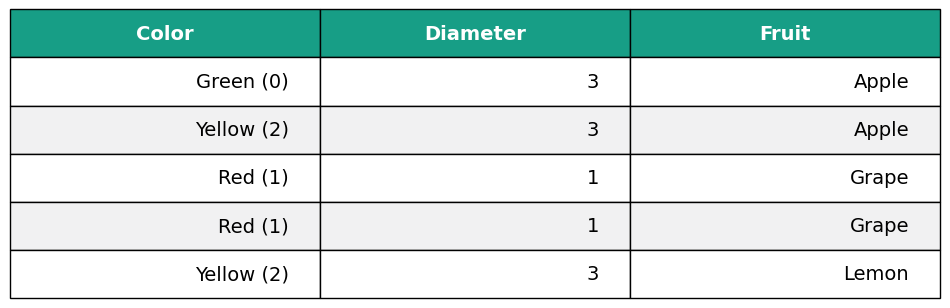

In [4]:
df = pd.DataFrame(dataset, columns=["Color", "Diameter", "Fruit"])
render_mpl_table(df)
plt.show()

## Step 3: Split Features and Labels

Separate the features (color, diameter) and labels (fruit type).

In [5]:
X = np.array([[row[0], row[1]] for row in dataset])  # Features (Color, Diameter)
y = np.array([row[2] for row in dataset])  # Labels (Fruit)

## Step 4: Encode Categorical Data

Convert the color feature from categorical to numerical using LabelEncoder.

In [6]:
label_encoder_color = LabelEncoder()
X[:, 0] = label_encoder_color.fit_transform(X[:, 0])  # Encode 'Color'

## Step 5: Train Decision Tree Classifier

Train a Decision Tree classifier using the encoded features and labels.

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Step 6: Test the Model with New Data

Test the trained model with new fruit data and make predictions.

In [8]:
new_fruits = [
    ["Green (0)", 3],
    ["Yellow (2)", 4],
    ["Red (1)", 2],
    ["Green (0)", 2]
]
new_fruits_encoded = np.array(new_fruits)
new_fruits_encoded[:, 0] = label_encoder_color.transform(new_fruits_encoded[:, 0])
predictions = clf.predict(new_fruits_encoded)
for i, fruit in enumerate(new_fruits):
    print(f"Fruit with color {fruit[0]} and diameter {fruit[1]} is predicted as: {predictions[i]}.")

Fruit with color Green (0) and diameter 3 is predicted as: Apple.
Fruit with color Yellow (2) and diameter 4 is predicted as: Apple.
Fruit with color Red (1) and diameter 2 is predicted as: Grape.
Fruit with color Green (0) and diameter 2 is predicted as: Grape.


## Step 7: Visualize the Decision Tree

Plot the trained Decision Tree for visual interpretation.

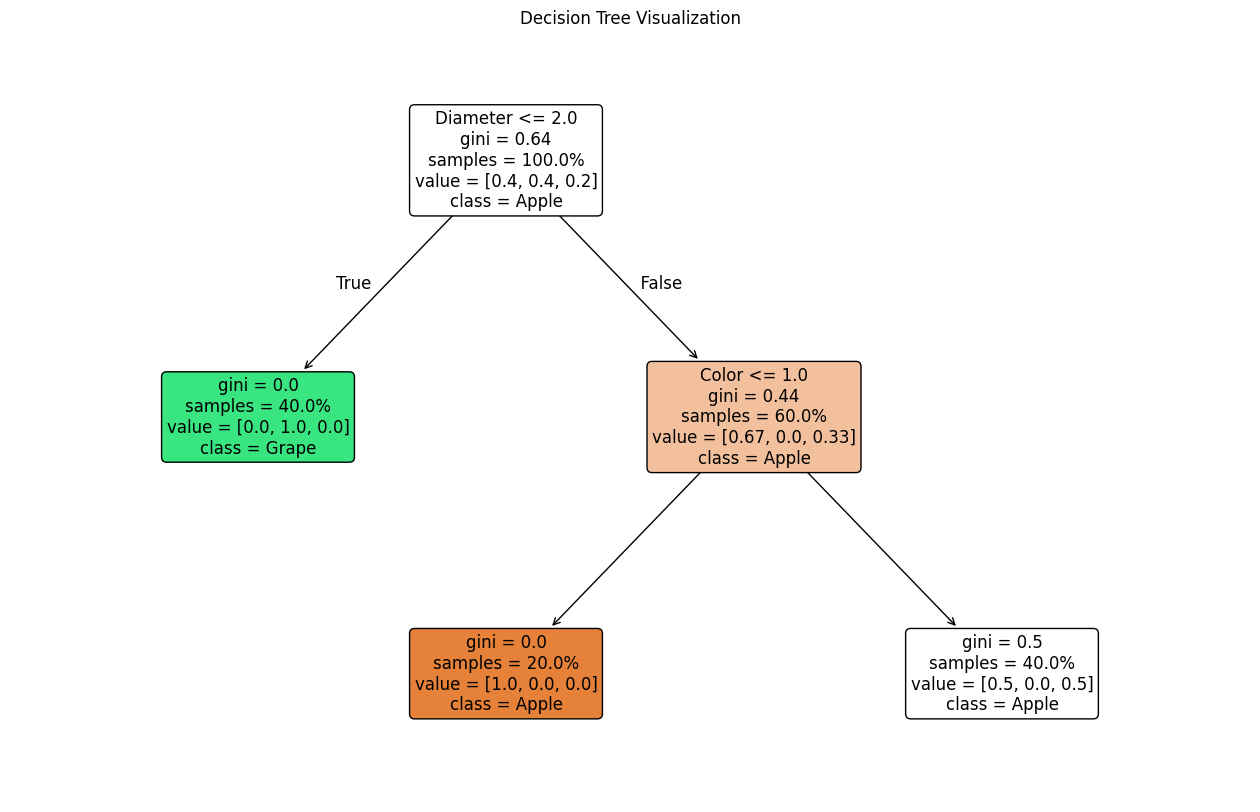

In [9]:
plt.figure(figsize=(16, 10))
plot_tree(
    clf, feature_names=["Color", "Diameter"],
    class_names=clf.classes_, filled=True,
    rounded=True, proportion=True,
    precision=2, fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()